In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

sys.path.append("../src/")

from fLe_timecrystal import fle
import plot_utils as pu
from plot import *

In [2]:
analytical_mat = pd.read_csv("../_raw/comparison/datapoints.csv", header = None)
analytical_mat.replace("{", "", regex = True, inplace = True)
analytical_mat.replace("}", "", regex = True, inplace = True)
analytical_mat = analytical_mat.transpose().reset_index()
analytical_mat_t = analytical_mat[analytical_mat["index"]%2==0]
analytical_mat_vals = analytical_mat[analytical_mat["index"]%2!=0]
analytical_mat_vals["index"] = analytical_mat_t[0].to_list()
analytical_mat_vals.columns = ["t", "anl_0.01", "anl_0.03", "anl_0.05", "anl_0.07", "anl_0.09"]
analytical_mat_vals = analytical_mat_vals.apply(lambda x: pd.to_numeric(x))

/tmp/ipykernel_1871260/820846944.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analytical_mat_vals["index"] = analytical_mat_t[0].to_list()


In [3]:
plt.style.use("plot_style.mplstyle")
data_path = "../_raw/time_crystal/"
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

avg = 4000
task_set = ["002"]
h_anl =0.1
T_trunc =  np.pi*7
alpha = [0.01, 0.03, 0.05, 0.07, 0.09]

0.01
Computing analytical....


/home/dsquevedovega/anaconda3/envs/dev_phys/lib/python3.9/site-packages/fbm/fbm.py:171: UserWarning: Combination of increments n and Hurst value H invalid for Davies-Harte method. Reverting to Hosking method. Occurs when n is small and Hurst is close to 1. 
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Computing analytical....


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.03
Computing analytical....


/home/dsquevedovega/anaconda3/envs/dev_phys/lib/python3.9/site-packages/fbm/fbm.py:171: UserWarning: Combination of increments n and Hurst value H invalid for Davies-Harte method. Reverting to Hosking method. Occurs when n is small and Hurst is close to 1. 
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Computing analytical....


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.05
Computing analytical....


/home/dsquevedovega/anaconda3/envs/dev_phys/lib/python3.9/site-packages/fbm/fbm.py:171: UserWarning: Combination of increments n and Hurst value H invalid for Davies-Harte method. Reverting to Hosking method. Occurs when n is small and Hurst is close to 1. 
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Computing analytical....


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.07
Computing analytical....


/home/dsquevedovega/anaconda3/envs/dev_phys/lib/python3.9/site-packages/fbm/fbm.py:171: UserWarning: Combination of increments n and Hurst value H invalid for Davies-Harte method. Reverting to Hosking method. Occurs when n is small and Hurst is close to 1. 
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Computing analytical....


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.09
Computing analytical....


/home/dsquevedovega/anaconda3/envs/dev_phys/lib/python3.9/site-packages/fbm/fbm.py:171: UserWarning: Combination of increments n and Hurst value H invalid for Davies-Harte method. Reverting to Hosking method. Occurs when n is small and Hurst is close to 1. 
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Computing analytical....


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


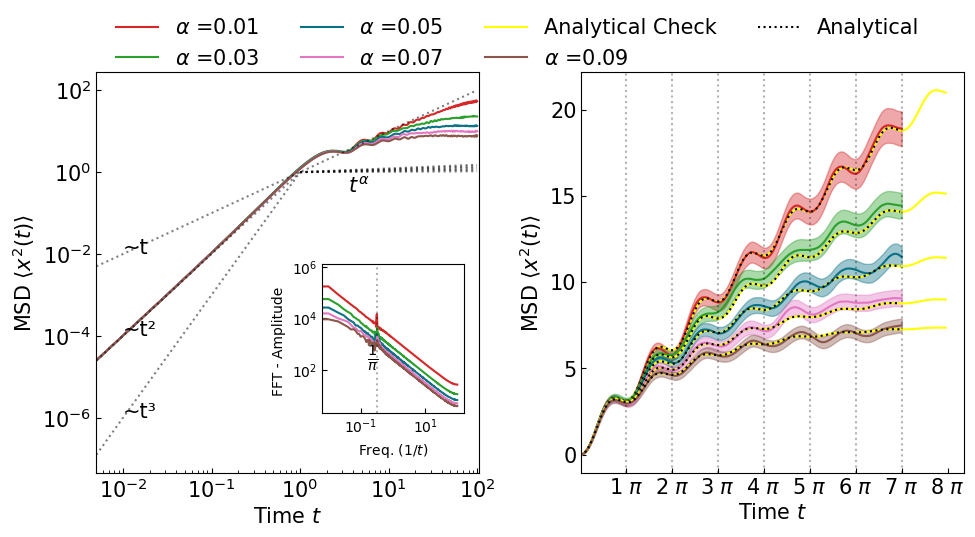

In [4]:
fig, ax = plt.subplots(1,2, figsize = (10,5));
axi = ax[0]
axins = ax[1]
axins_ = axi.inset_axes([0.59, 0.15, 0.37, 0.37])
#axins_ = axi.inset_axes([0.0, 1.17, 1.0, 0.4])

T = 100
h = 0.005
v0 = 1.0
M = 1.0
eta_1 = 1.0
eta_2 = 0.0
T1 = 1.0
T2 = 0.0

linear = 0
for i, a in enumerate(alpha):
    print(a)
    eq = fle(a, linear)
    eq.params(T = T, h = h,
              v0 = v0, M = M,
              eta_1 = eta_1, eta_2 = eta_2,
              T1 = T1, T2 = T2)
    if a == alpha[-1]:
        legend_anl = True
        axins.plot(analytical_mat_vals.t, analytical_mat_vals["anl_"+str(a)], color = "yellow", ls="-", marker="", label = "Analytical Check")
    else: 
        legend_anl = False
        axins.plot(analytical_mat_vals.t, analytical_mat_vals["anl_"+str(a)], color = "yellow", ls="-", marker="")
    plot_msd(eq = eq, avg = avg, task_set = task_set, data_path = data_path, 
             ax = axins, color_fd = colors[9 - i], analytical = True, T = T_trunc, h = h_anl, 
             legend_main = True, legend_second = legend_anl, ci_normal = True, truncate = T_trunc)
    plot_msd(eq = eq, avg = avg, task_set = task_set, data_path = data_path, 
             ax = axi, color_fd = colors[9 - i], analytical = False,
             legend_main = False)
    if i == 0:
        add_trend(axi, x0 = 1, xf = T, func = talpha, text = r"$~t^{\alpha}$", xtext = 3, dy = -0.7, alpha = a)
    else:
        add_trend(axi, x0 = 1, xf = T, func = talpha, alpha = a)
    
    df_ft = get_ft(eq, avg, task_set, data_path)
    plot_fft(axins_, df_ft, color = colors[9 - i], half = True)
    df_freq = get_freq(df_ft)
    
add_1_npi(axins_, n = 1)
pu.resize_names(axins_)

add_trend(axi, x0 = h, xf = T, func = t, text = "~t", xtext = 0.01)
add_trend(axi, x0 = h, xf = 1, func = t2, text = "~t²", xtext = 0.01)
add_trend(axi, x0 = h, xf = 1, func = t3, text = "~t³", xtext = 0.01)
add_perio_grid(axins, 1/np.pi, T_trunc, times = 1)

axi.set_xscale("log")
axi.set_yscale("log")
axins_.set_xscale("log")
axins_.set_yscale("log")

axi.set_ylabel("MSD " r"$\langle x^2 (t) \rangle$")
axi.set_xlabel("Time "+"$t$")

axins.set_ylabel("MSD " r"$\langle x^2 (t) \rangle$")
axins.set_xlabel("Time "+"$t$")

axins_.set_ylabel("FFT - Amplitude ")
axins_.set_xlabel("Freq. "+ r"$(1/t)$")


handles, labels = axins.get_legend_handles_labels()
axins.get_legend().remove()

fig.legend(handles, labels, bbox_to_anchor = (0.95, 1.10), ncol = 4)
fig.tight_layout()
